# Linhas de Transmissão e o Primeiro Cabo Transatlântico de Comunicação 

Neste Tutorial veremos como a teoria de sistemas lineares pode ser aplicada na análise de linhas de transmissão por meio da Transformada de Laplace. Como aplicação específica será discutido o primeiro cabo telegráfico transatlântico, que foi estendido no leito do oceano atlântico norte por uma extensão de aproximadamente 3700km conectando Newfoundland no Canadá à Irlanda, em 1858. Tendo falhado após poucas semanas, o segundo e definitivo cabo foi instalado em 1865.  

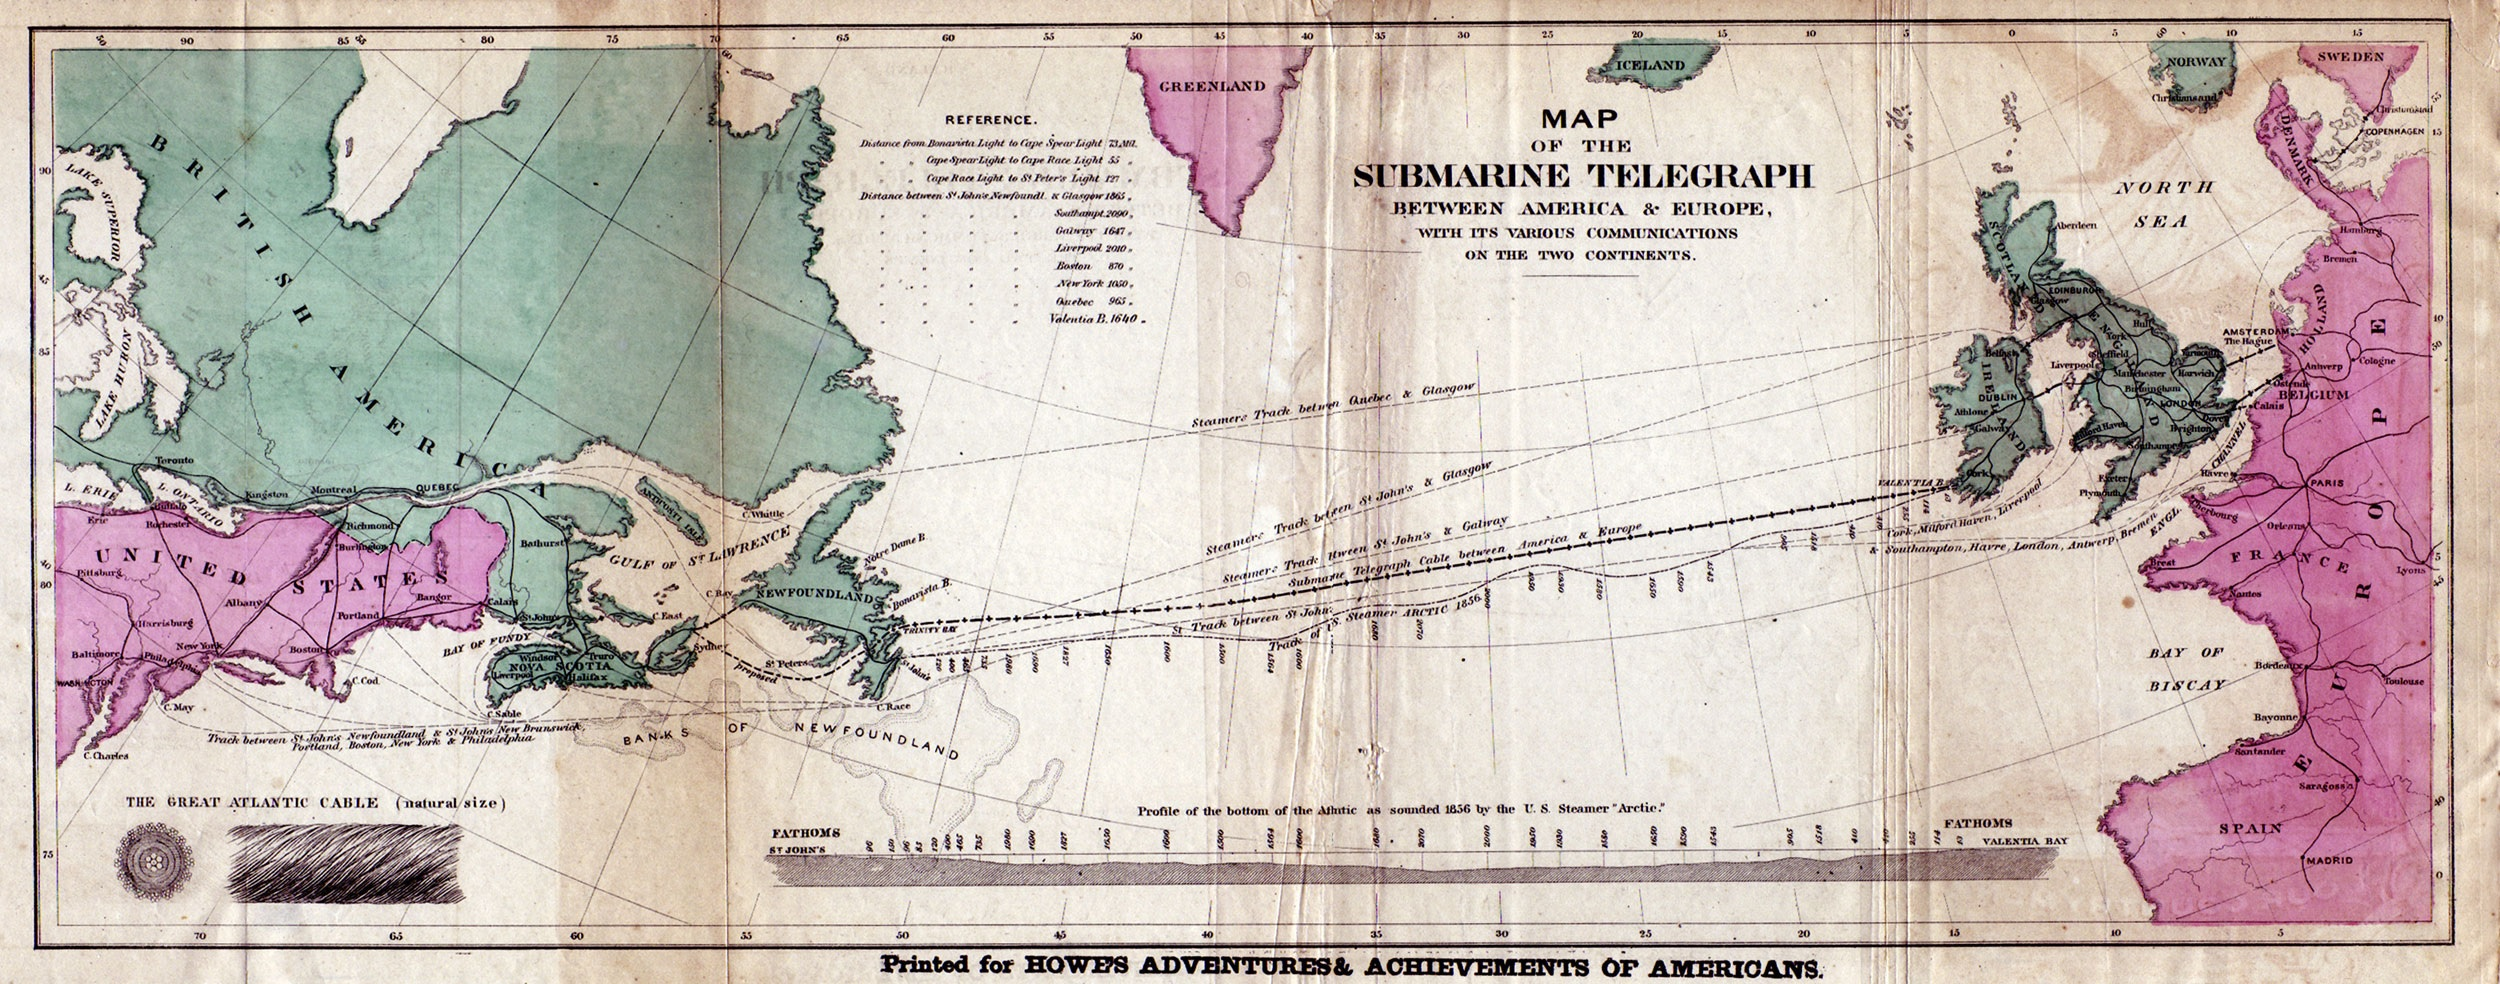

O primeiro estudo teórico da propagação de sinais elétricos em um cabo de grande extensão foi realizado por William Thompson, posteriormente elevado a nobreza e hoje conhecido como Lord Kelvin, em 1854. Thompson modelou uma linha telegráfica submersa como um longo fio condutor coberto por um isolante elétrico perfeito, e finalmente por outra camada condutora, em um arranjo conhecido hoje como cabo coaxial. O isolante utilizado foi a goma de gutta-percha, uma goma natural asiática com propriedades isolantes superiores à da borracha. A camada externa condutora era a própria água salgada do oceano. Devido a capacidade isolante do material utilizado, Thompson desprezou os efeitos de fuga de corrente, e portanto, a condutância de fuga no  modelo matemático à parâmetros distribuídos do cabo. Além disso, Thompson também considerou o cabo como um elemento não indutivo (nas baixas velocidades então utilizadas na comunicação de sinais telegráficos o efeitos indutivos que dependem da frequência de chaveamento eram de fato desprezíveis), e portanto, em sua analíse, $G=L=0$. Anos mais tarde Oliver Heaviside incluiu estes parâmetros em sua sua análise, derivando a  equação diferencial da onda eletromagnética aplicada à propagação em Linhas de Transmissão, também conhecida como  equação do telegrafista.  A equação de Thompson, por outro lado é análoga a equação utilizada para modelasgem de transporte de calor, e é portanto classificada propriamente como equação de difusão.   Na análise a seguir será utilizada a teoria de sistemas lineares para   realização da modelagem da propagação segundo o modelo de Thompson.  


Inicialmente importamos Lcapy:

In [1]:
from lcapy import *

Uma linha de transmissão geral pode ser descrita como mostrado abaixo. Aqui a entrada é aberta, e a linha alimenta uma carga genérica $Z_l$. Além disso, a impedância característica da linha $Z_0$, a constante complexa de propagação $\gamma=\sqrt{(R+j\omega L)(G+j\omega C)}$ e o comprimento da linha $x$ são deixados sem ser especificados. 

In [2]:
clt=Circuit("""  
TL 3 0_3 2 0_2,Z_0, gamma, x; right
W 3 4; right=0.5
Z 4 0_4, Z_l; down
W 0_3 0_4; right
P2 3 0_3; down, v=V_2
P1 2 0_2; down, v_=V_1
; draw_nodes=connections, label_nodes=none""")

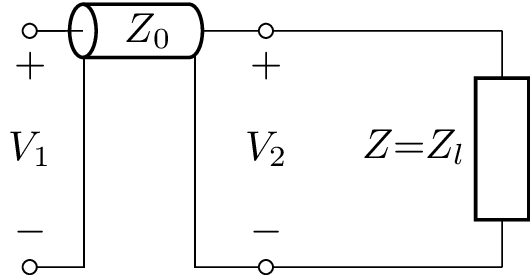

In [3]:
clt.draw()


A impedância de entrada - *driving-point impedance* -  nos terminais de entrada pode então ser obtida:

In [4]:
clt.P1.dpZ.simplify()

Z₀⋅(Z₀⋅sinh(γ⋅x) + Zₗ⋅cosh(γ⋅x))
────────────────────────────────
  Z₀⋅cosh(γ⋅x) + Zₗ⋅sinh(γ⋅x)   

Para o cabo transatlântico consideramos uma linha infinita
e para este fim fazemos $Z_l=Z_0$.  Além disso, inserimos uma fonte degrau de tensão $u(t)$ e a conectamos com o circuito descrito acima. 

In [5]:
clt.add('W 1 2;right')
clt.add('W 0 0_2;right')
clt.add( 'Vs 1 0 {u(t)};down ')
clt=clt.subs({'Z_l':'Z_0'})

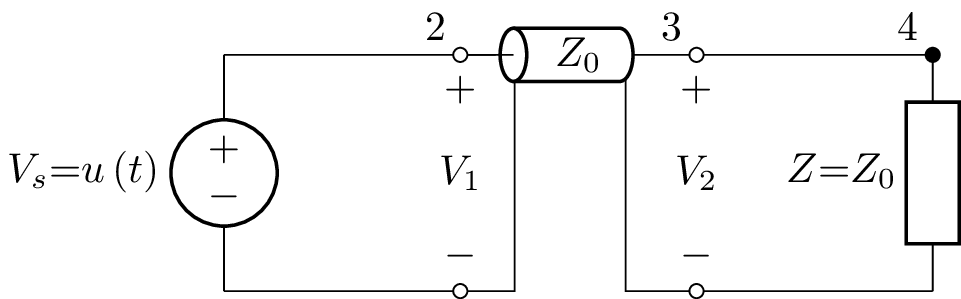

In [6]:
clt.draw();

A tensão em um ponto *x* em uma linha de transmissão é dada por suas componentes incidentes e refletidas como:

$$V(x,s)=K_1e^{-\gamma x}+K_2e^{\gamma x}$$

onde $\gamma=\sqrt{(R+sL)(G+sC)}$, a constante complexa de propagação. Por outro lado, a linha é infinita e portanto a componente refletida é nula, ou seja

$$V(x,s)=K_1e^{-\gamma x}$$

Desde que em *x*=0 temos $V(0,s)=K_1=\mathcal{L}(u(t))=\frac{1}{s}$,
$$V(x,s)=\frac{e^{-\gamma x}}{s}$$
Este resultado é confirmado tomando a tensão nos terminais da carga como mostrado abaixo:

In [7]:
clt.P2.V

 -γ⋅x
ℯ    
─────
  s  

No modelo de Thompson $\gamma=\sqrt{RCs}$, portanto

In [8]:
Vs=clt.P2.V.subs({'gamma':'sqrt(R*C*s)'})
Vs

 -√C⋅√R⋅√s⋅x
ℯ           
────────────
     s      

cuja transformada inversa é (para obter a transformada inversa é suficiente acrescentar "(*t*)"ao final da expressão no domínio  *s*):

In [9]:
v=Vs(t).simplify()
v

⎛       ⎛√C⋅√R⋅x⎞⎞     
⎜1 - erf⎜───────⎟⎟⋅u(t)
⎝       ⎝  2⋅√t ⎠⎠     

Onde $erf(x)$ é a função erro de *x*. A grandeza de interesse aqui é a corrente no receptor, e assim  tensão $V_s$ é dividida pela impedância  $Z(s)=\sqrt{\frac{R+sL}{G+sC}}=\sqrt{\frac{R}{sC}}$

In [10]:
Z=impedance('sqrt(R/(C*s))')
Vs/Z

    -√C⋅√R⋅√s⋅x
√C⋅ℯ           
───────────────
           ___ 
          ╱ 1  
  √R⋅s⋅  ╱  ─  
       ╲╱   s  

Para a calcular transformada inversa de laplace da corrente simplificamos o denominador da equação acima como mostrado na próxima célula:

In [11]:
R,C,x = symbols("R, C,x")
i=(expr(sqrt(C/R)*exp((-sqrt(R*C))*sqrt(s)*x))/sqrt(s))(t)
i

          2                 
    -C⋅R⋅x                  
    ────────                
      4⋅t                   
√C⋅ℯ        ⋅u(t)           
─────────────────  for t ≥ 0
     √π⋅√R⋅√t               

 Os valores padrão de resistência e capacitância por kilômetro eram  $R=1,62\quad \Omega/Km$ e $C=2,7.10^{-7}\quad F/Km$. Substituindo estes valores em $i(t)$ podemos calcular a corrente no receptor. A corrente como função do tempo no terminal receptor, 3704 Km do transmissor é então:

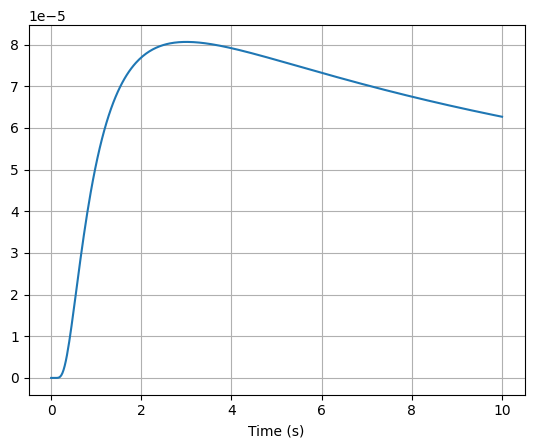

In [12]:
i.subs({'x':3704,'R':1.62,'C':2.7e-7}).plot((0.001,10));

Esta corrente é a resposta à um degrau unitário de tensão aplicado à entrada da linha, na qual pode ser observado um atraso de aproximadamente 3 segundos para a corrente atingir seu pico no receptor, em relação ao instante em que ocorre o degrau. Este atraso era responsável por impor limites severos na velocidade com que sinais poderiam ser enviados através da linha, como será discutido mais adiante. Para uma tensão aplicada de 1 V, o pico da corrente recebida alcança aproximadamente 80 Miliamperes, e na realidade as tensões utilizadas na entrada eram de algumas dezenas de Volts. Como o valor máximo da corrente recebida era pequeno para ser medido de forma confiável, W. Thompson desenvolveu um  galvanômetro de alta sensibilidade, o galvanômetro de espelho, o qual detectava uma corrente elétrica refletindo um feixe de luz com um espelho. O feixe de luz é projetado em uma escala e atua como um ponteiro longo sem massa, portanto, com alta sensibilidade (ver figura mais abaixo). Além disso, ao invés do código Morse padrão baseado nos símbolos representados pelos sinais ponto-traço comumente utilizados em telegrafia, o cabo transatlântico era operado com pulsos de polaridades invertidas para facilitar a identificação de símbolos diferentes na recepção. 

Uma característica importante do cabo atlântico tal como modelado por Thompson era a distorção de fase produzida durante a propagação. Sabemos que uma entrada arbitrária pode ser representada por uma soma infinita de harmônicas senoidais. Considere uma harmônica com determinada frequência $\omega_0$.     Para esta harmônica, $\gamma=\sqrt{(R+j\omega_0L)(C+j\omega_0C)}=\sqrt{j}\sqrt{\omega_0RC}=\frac{1+j}{\sqrt{2}}\sqrt{\omega_0RC}$. Assim, $\alpha=\beta=\sqrt{\frac{\omega_0RC}{2}}$ e substituindo na solução da equação da onda, $E_0e^{-\alpha x}\cos(\omega_0t-\beta x)$, onde $E_0$ é a amplitude da harmônica com frequência $\omega_0$, temos 

$$E(x,t)=E_0e^{-\sqrt{\frac{\omega_0RC}{2}}x}\cos(\omega_0t-\sqrt{\frac{\omega_0RC}{2}}x)$$

Como pode ser visto, a atenuação da tensão é dependente da frequência, da mesma forma que a velocidade de propagação, a qual é dada por $v_f=\frac{\omega_0}{\beta}=\sqrt{\frac{2\omega_0}{RC}}$, ou seja, harmônicas diferentes propagam-se com velocidades diferentes espalhando e distorcendo o sinal. Como resultado, dois pulsos diferentes podem ser sobrepostos, causando o que é conhecido como interferência intersimbólica. Para prevenir este efeito a velocidade de chaveamento deveria ser baixa o suficiente para que pulsos diferentes fossem claramente identificavéis na recepção.

Outra característica presente na modelagem realizada por Thompson é discutida a seguir. Precisamos obter uma forma de calcular a resposta de corrente para uma entrada arbitrária, a qual pode ser obtida com a integral de convolução entre a tensão arbitrária de entrada e a resposta ao impulso para corrente $h(t)$. Sabendo que $i(t)$ obtida acima é a resposta de corrente à um degrau unitário, e que a derivada temporal do degrau é o impulso $\delta(t)$, conseguimos a resposta ao impulso com a derivada temporal de $i(t)$, ou seja:

In [13]:
h=diff(i,t)
h

                  2                   2                   2                 
            -C⋅R⋅x              -C⋅R⋅x              -C⋅R⋅x                  
            ────────            ────────            ────────                
 3/2     2    4⋅t                 4⋅t                 4⋅t                   
C   ⋅√R⋅x ⋅ℯ        ⋅u(t)   √C⋅ℯ        ⋅δ(t)   √C⋅ℯ        ⋅u(t)           
───────────────────────── + ───────────────── - ─────────────────  for t ≥ 0
              5/2                √π⋅√R⋅√t                   3/2             
        4⋅√π⋅t                                     2⋅√π⋅√R⋅t                

Igualando a expressão acima (desconsiderando o termo impulsivo) a zero, e resolvendo para *t*, encontramos o instante $t_{max}$ onde a corrente atinge seu pico, isto é,
$$t_{max}=\frac{1}{2}RCx^2.$$

A dependência do valor de pico da corrente com o quadrado da distância era conhecido como a Lei dos Quadrados de Thompson. Segundo esta lei, dobrando a distância quadruplicaria o atraso na corrente de pico, o que por sua vez também levava a redução da máxima taxa de transmissão. 



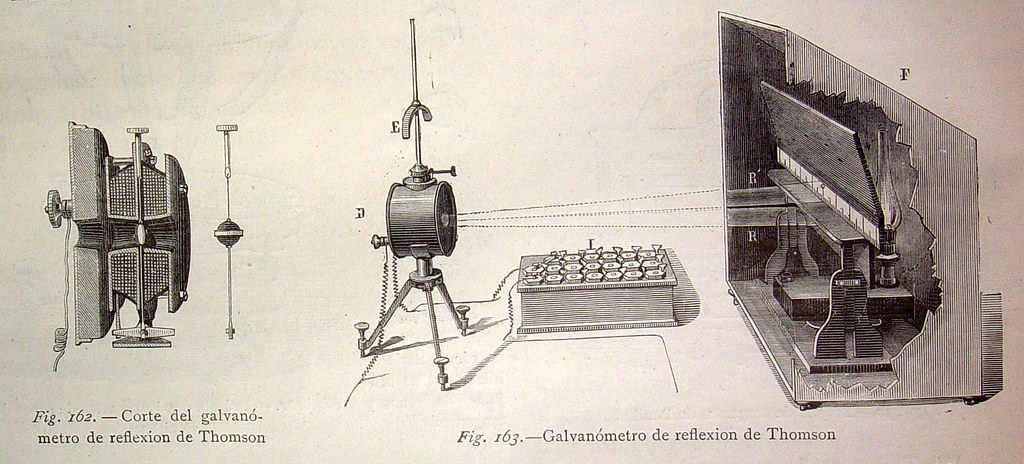

Fizemos acima o gráfico da corrente no receptor com uma entrada degrau no transmissor com o pacote Lcapy, que é baseado no pacote Sympy de cálculo símbólico para o ecossistema Python. Se queremos analisar a resposta para outras entradas, devemos agora usar os resultados anteriores com os pacotes númérico e gráfico Numpy e Matplotlib. Usando Numpy em python, implementamos a resposta ao impulso obtida previamente e plotamos o gráfico no código abaixo. Inicialmente definimos os parâmetros da linha:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

tmin=1e-15
tmax=10
ndiv=10000

R=1.62
C=2.7e-7
x=3704

*t* é o vetor que representa o tempo discretizado, e $e_i$ é a entrada que incialmente é definida como um degrau unitário. Definimos então h1 e h2 como as duas parcelas não impulsivas da resposta à entrada degrau calculadas acima.

In [15]:
t=np.linspace(tmin,tmax,ndiv)
deltat=(tmax-tmin)/ndiv

In [16]:
 e_i=np.ones(len(t))

In [17]:
exp=(x**2)*R*C/4
f1=((x**2)*(C**1.5)/4)*np.sqrt(R/np.pi)
f2=np.sqrt(C/(R*np.pi))/2
h1=np.exp(-exp/t)/(t**2.5)
h2=np.exp(-exp/t)/(t**1.5)

Finalmente o gráfico da resposta h1-h2 é feito com o *script* de código abaixo:

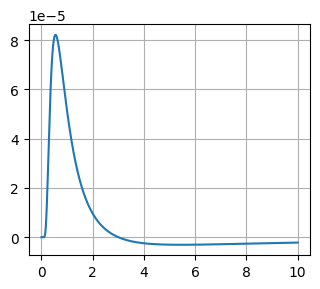

In [18]:
fig = plt.figure(figsize=(8,3))
ax1=plt.subplot(1,2,1)
ax1.plot(t,f1*h1[:ndiv]-f2*h2[:ndiv])
ax1.grid()

Agora, para simular a transmissão real de uma mensagem baseada na codificação de Morse modificada como discutimos acima, utilizaremos pulsos unitários positivos e negativos representando traços e pontos. cada pulso tem 1 *s* de duração, e os pulso são separados por um nulo de 1 *s*. Separando os cacacteres transmitidos, é enviado um nulo de 2 s de duração de modo que caracteres diferentes possam ser separados na recepção. No código abaixo a entrada é definida como a sequência de dois caracteres. 

In [19]:
tmax=20
t=np.linspace(tmin,tmax,ndiv)
deltat=(tmax-tmin)/ndiv

e_i=np.zeros(len(t))
for k in range(len(t)):
    if t[k]<1:
        e_i[k]=1
    elif (t[k]>2 and t[k]<3):
        e_i[k]=-1 
    elif (t[k]>4 and t[k]<5):
        e_i[k]=-1
    elif t[k]>6 and t[k]<7:
        e_i[k]=1
    elif t[k]>8 and t[k]<9:
        e_i[k]=-1 
    elif t[k]>11 and t[k]<12:
        e_i[k]=1 
    elif t[k]>13 and t[k]<14:
        e_i[k]=1 
    elif t[k]>15 and t[k]<16:
        e_i[k]=-1
    elif t[k]> 17 and t[k]<18:
        e_i[k]=-1


h1=np.exp(-exp/t)/(t**2.5)
h2=np.exp(-exp/t)/(t**1.5)

A corrente no receptor é obtida como a convolução numérica entre a entrada implementada acima e a resposta ao impulso, e depois, os pulsos de entrada e a corrente de saída são plotados. 

In [20]:
i=(f1*np.convolve(e_i,h1)-f2*np.convolve(e_i,h2))*deltat

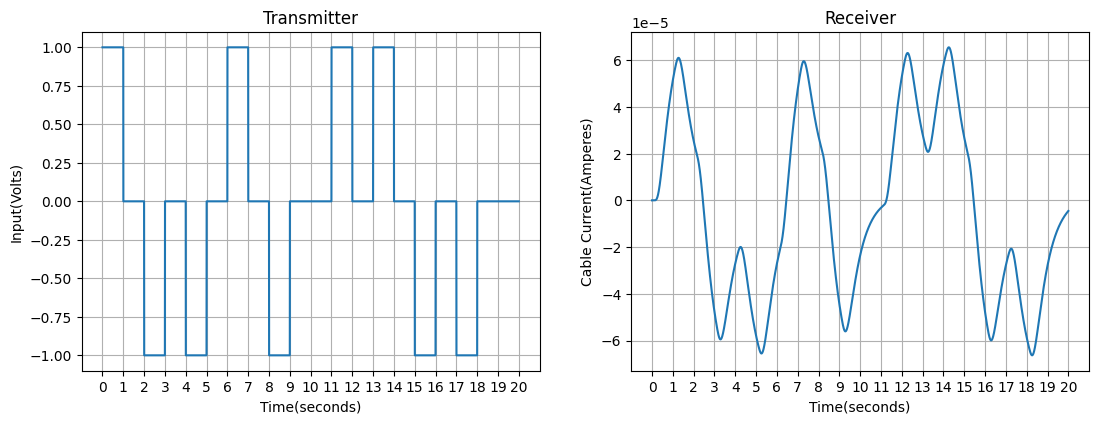

In [21]:
fig = plt.figure(figsize=(13,4.4))
ax1=plt.subplot(1,2,1)
ax1.plot(t,e_i[:ndiv])
ax1.set_xticks(np.arange(0,tmax+1))
ax1.set_title('Transmitter')
ax1.set_xlabel('Time(seconds)')
ax1.set_ylabel('Input(Volts)')
ax1.grid()
ax2=plt.subplot(1,2,2)
ax2.plot(t,i[:ndiv])
ax2.set_xticks(np.arange(0,tmax+1))
ax2.set_title('Receiver')
ax2.set_xlabel('Time(seconds)')
ax2.set_ylabel('Cable Current(Amperes)')
ax2.grid()

O gráfico acima à direita mostra que os caracteres trasmitidos podem ser corretamente identificados na recepção. 